In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class label','alcohol','malic acid']

In [3]:
df

,class label,alcohol,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [4]:
df.shape

(178, 3)

<Axes: xlabel='alcohol', ylabel='Density'>

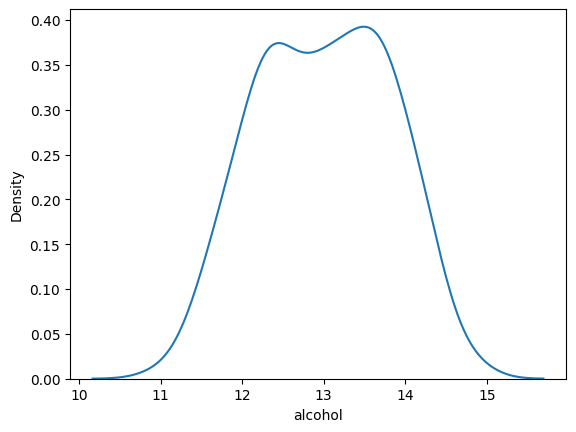

In [5]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='malic acid', ylabel='Density'>

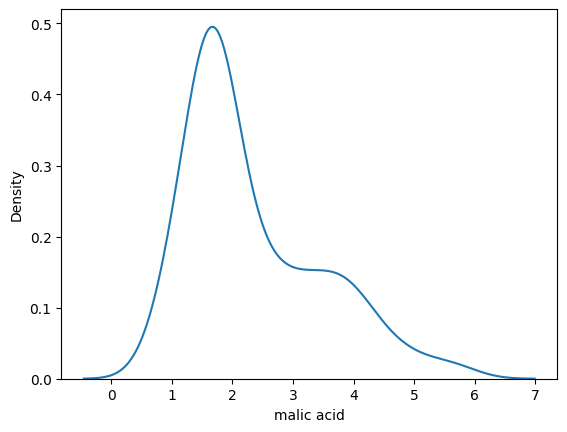

In [6]:
sns.kdeplot(df['malic acid'])

<Axes: xlabel='alcohol', ylabel='malic acid'>

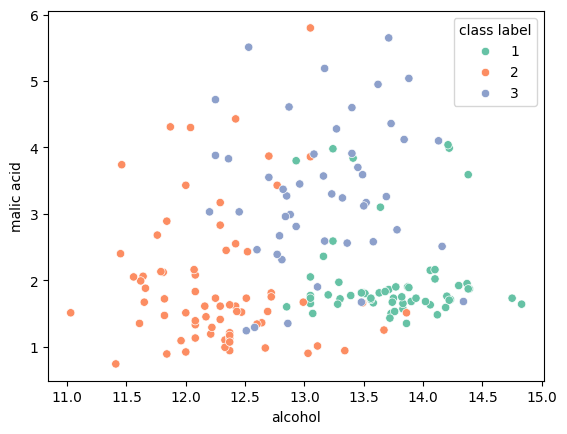

In [7]:
sns.scatterplot(x='alcohol',y='malic acid',data=df,hue='class label',palette='Set2')

In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train , y_test =train_test_split(df.drop('class label',axis=1),df['class label'],test_size=0.2,random_state=0)

In [9]:
x_train.shape ,x_test.shape

((142, 2), (36, 2))

#### minmax import

In [10]:
from sklearn.preprocessing import MinMaxScaler


scalar = MinMaxScaler()

# normal fit
scalar.fit(x_train)

#! transform one
x_train_s= scalar.transform(x_train)
x_test_s=scalar.transform(x_test)

In [11]:
x_train_s= pd.DataFrame(x_train_s,columns=x_train.columns)
x_test_s= pd.DataFrame(x_test_s,columns=x_test.columns)

In [12]:
np.round(x_train_s.describe(),2)


,alcohol,malic acid
count,142.00,142.00
mean,0.53,0.33
std,0.22,0.23
min,0.00,0.00
25%,0.35,0.18
50%,0.54,0.24
75%,0.70,0.51
max,1.00,1.00


In [13]:
x_train.describe()

,alcohol,malic acid
count,142.000000,142.000000
mean,12.984859,2.372606
std,0.807175,1.115360
min,11.030000,0.740000
25%,12.347500,1.602500
50%,13.040000,1.895000
75%,13.637500,3.222500
max,14.750000,5.650000


Text(0.5, 1.0, 'after the trasformation')

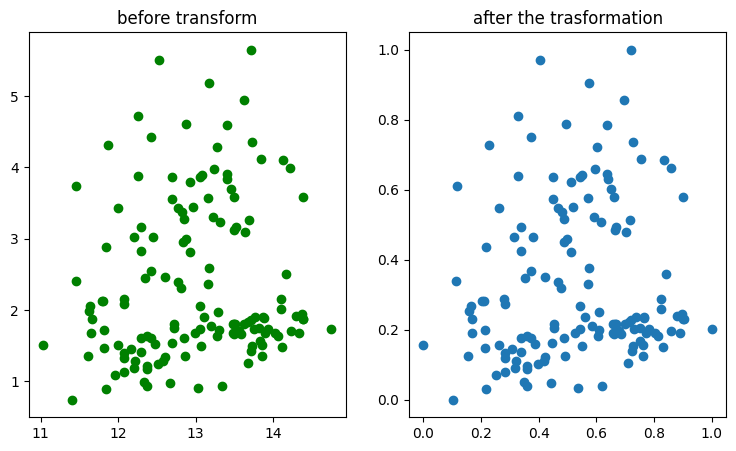

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(9,5))

ax1.scatter(x_train['alcohol'],x_train['malic acid'],color='green')
ax1.set_title("before transform")
ax2.scatter(x_train_s['alcohol'],x_train_s['malic acid'])
ax2.set_title("after the trasformation")

<Axes: xlabel='alcohol', ylabel='Density'>

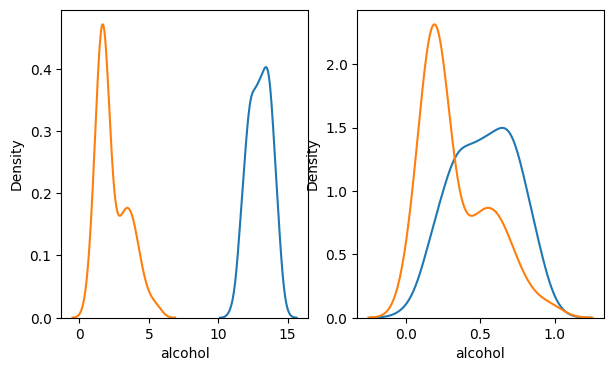

In [15]:
fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(7,4))
sns.kdeplot(x_train['alcohol'],ax=ax)
sns.kdeplot(x_train['malic acid'],ax=ax)

sns.kdeplot(x_train_s['alcohol'],ax=ax2)
sns.kdeplot(x_train_s['malic acid'],ax=ax2)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()
lr1= LogisticRegression()

In [18]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
y_train

161    3
92     2
94     2
174    3
24     1
      ..
103    2
67     2
117    2
47     1
172    3
Name: class label, Length: 142, dtype: int64

In [19]:
lr1.fit(x_train_s,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
y_pred = lr.predict(x_test)

In [21]:
y_pred_t=lr1.predict(x_test_s)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print("accuracy score " ,accuracy_score(y_test,y_pred))

accuracy score  0.7222222222222222


In [24]:
print("accuracy_score of transform ",accuracy_score(y_test,y_pred_t))

accuracy_score of transform  0.75
